In [145]:
import pandas as pd
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [146]:
df.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [147]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [148]:
df.benefits.value_counts()

Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64

In [149]:
df.care_options.value_counts()

No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [151]:
df.comments.unique()[:5]

array([nan,
       "I'm not on my company's health insurance which could be part of the reason I answered Don't know to so many questions.",
       'I have chronic low-level neurological issues that have mental health side effects. One of my supervisors has also experienced similar neurological problems so I feel more comfortable being open about my issues than I would with someone without that experience. ',
       "My company does provide healthcare but not to me as I'm on a fixed-term contract. The mental healthcare I use is provided entirely outside of my work.",
       'Relatively new job. Ask again later'], dtype=object)

In [152]:
df.no_employees.unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [153]:
df.benefits.value_counts()

Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [155]:
df.rename(columns={'Age': 'age'}, inplace=True)
df.rename(columns={'no_employees': 'employee_size'}, inplace=True)
df.rename(columns={'treatment': 'is_getting_treatment'}, inplace=True)
df.rename(columns={'care_options': 'has_care'}, inplace=True)
df.rename(columns={'wellness_program': 'has_wellness_prog'}, inplace=True)
df.rename(columns={'seek_help': 'help_is_encouraged'}, inplace=True)
df.rename(columns={'mental_vs_physical': 'bias_towards_mhealth'}, inplace=True)


C:\Users\catra\AppData\Local\Temp\ipykernel_7800\2344951323.py:10: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



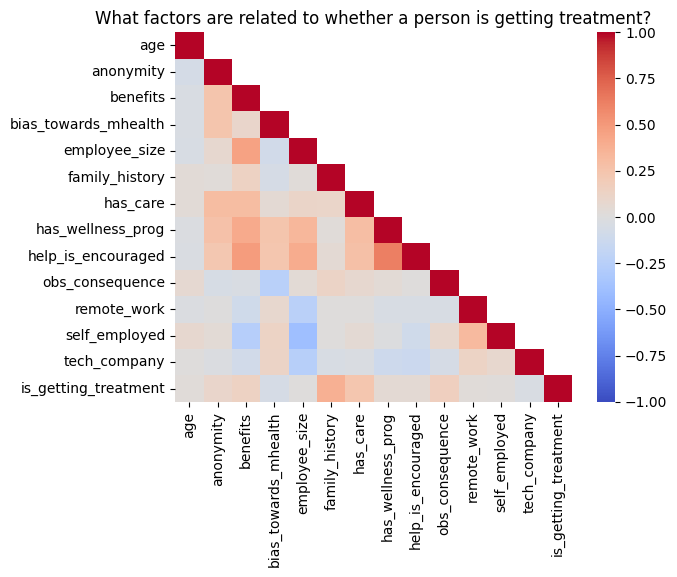

In [159]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mapping = {'Yes': 1, 'No': 0, 'Not sure': 0.5, "Don't know":0.5, '1-5': 1, '6-25': 2, '26-100': 3, '100-500': 4, '500-1000':5, 'More than 1000':6}

df.replace(mapping, inplace=True)
df = pd.concat([df[df.columns.difference(['is_getting_treatment'])], df[['is_getting_treatment']]], axis=1)

corr_matrix = df.corr()

mask = np.triu(np.ones_like(corr_matrix), k=1)

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title('What factors are related to whether a person is getting treatment?')
plt.show()

In [90]:
order_of_ticks = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

In [91]:
df.benefits.value_counts()

1.0    477
0.5    408
0.0    374
Name: benefits, dtype: int64

In [92]:
df.remote_work.value_counts()

0    883
1    376
Name: remote_work, dtype: int64

In [93]:
df.tech_company.value_counts()

1    1031
0     228
Name: tech_company, dtype: int64

In [94]:
df.self_employed.value_counts()

0.0    1095
1.0     146
Name: self_employed, dtype: int64

In [95]:
df.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [96]:
df_comments = df.dropna(subset=['comments'])
len(df_comments)

164

In [103]:
import plotly.express as px

def create_interactive_figure(df):
    fig = px.scatter(df, x='x_position', y='y_position', text='comments', hover_data=['comments'],
                     color='benefits', color_continuous_scale='RdBu', range_color=[0, 1],
                     size='benefits', size_max=40, opacity=0.7)

    fig.update_traces(marker=dict(symbol='circle', sizemode='diameter'), selector=dict(mode='markers'))

    # Set layout options
    fig.update_layout(
        title='Interactive Figure with Balls',
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        dragmode='lasso',  # Enable click and drag
        hovermode='closest',
        showlegend=False
    )
    

    return fig


In [108]:
import pandas as pd
import numpy as np
import plotly.express as px

# Assuming df_comments is your DataFrame
# Add a random component to the x-coordinate
df_comments['x_coordinate_column'] = np.random.rand(len(df_comments))

# Create a figure with scatter plot
fig = px.scatter(df_comments, x='x_coordinate_column', y=df_comments.index, 
                 color='benefits', hover_data=['comments'])

# Update marker symbols based on benefits column
fig.update_traces(marker=dict(symbol=[0 if val == 1 else 1 if val == 0 else 2 for val in df_comments['benefits']]))

# Define the gravitational pull
gravity_pull = 0.002

# Define the simulation step
simulation_step = 0.01

# Simulation loop to update positions over time
for i in range(100):
    df_comments['x_coordinate_column'] += np.random.normal(scale=0.01, size=len(df_comments))
    df_comments['x_coordinate_column'] = np.clip(df_comments['x_coordinate_column'], 0, 1)
    
    # Apply gravitational pull
    df_comments['x_coordinate_column'] -= gravity_pull * i
    
    # Update scatter plot
    fig.update_traces(x=df_comments['x_coordinate_column'])

    # Show the plot
    fig.show()

    # Add a slight delay for visualization
    import time
    time.sleep(0.1)


KeyboardInterrupt: 

In [105]:
df_comments['x_position'] = [i for i in range(len(df_comments))]
df_comments['y_position'] = [0] * len(df_comments)

# Create interactive figure
fig = create_interactive_figure(df_comments)

fig.show()


## Model time

In [97]:
df =df.drop(columns=['Timestamp', 'comments', 'state'])

In [98]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')